## Polynomial Regresion

Complex non-linear data can be fit with polynominal equestions. This is called Polynomial Regression.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

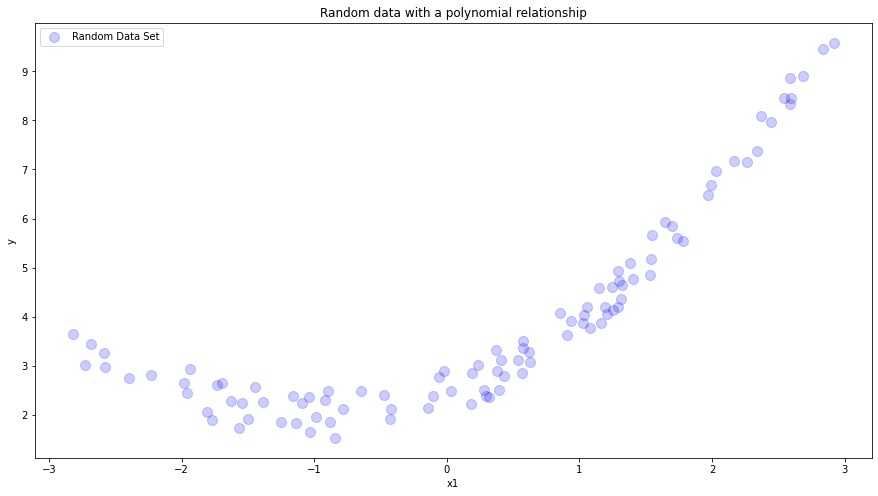

In [6]:
def generate_non_linear_data():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1) 
    return X, y

X, y = generate_non_linear_data()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((15, 8))
ax.scatter(X, y, c = 'b', s = 100, alpha = 0.2, label = "Random Data Set")
ax.set_title(f"Random data with a polynomial relationship")
plt.xlabel('x1')
plt.ylabel('y')
ax.legend()

### **Generate Polynomial Features**

SciKit Learn provides a means to generate polynomial features. 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html


Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

print(f"Original: {X[0]}")
print(f"Original and it's Squared: {X_poly[0]}")

Original: [0.62345158]
Original and it's Squared: [0.62345158 0.38869187]


y = 0.5082983800317113*x1^2 1.0037337468211434*x2 + 2.472256206531701


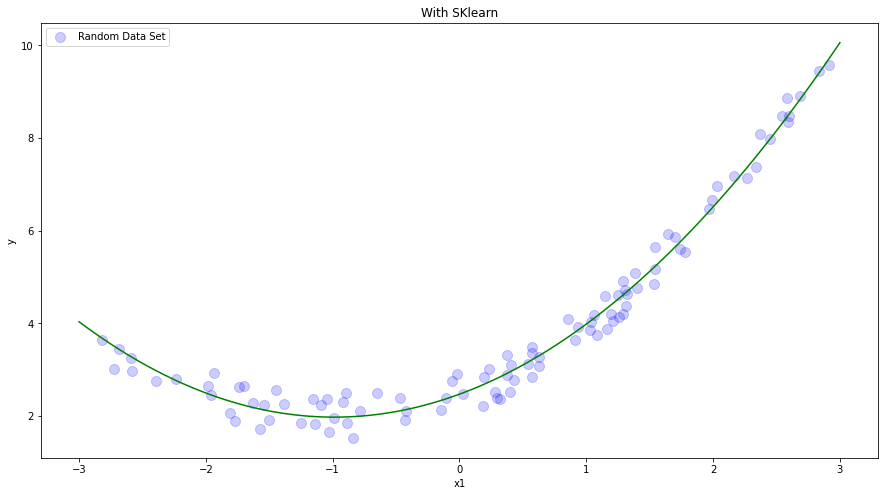

In [20]:
from sklearn.linear_model import LinearRegression

# fit regression model with poly features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

coefficents = lin_reg.coef_.ravel()
intercept = lin_reg.intercept_[0]

print(f"y = {coefficents[1]}*x1^2 {coefficents[0]}*x2 + {intercept}")

X_new = np.linspace(-3, 3, 100)
y_pred = coefficents[1] * np.square(X_new) + coefficents[0] * X_new + intercept


fig, ax = plt.subplots(1, 1)
fig.set_size_inches((15, 8))
ax.scatter(X, y, c = 'b', s = 100, alpha = 0.2, label = "Random Data Set")
ax.plot(X_new, y_pred, c = 'g')
ax.set_title(f"With SKlearn")
plt.xlabel('x1')
plt.ylabel('y')
ax.legend()